In [1]:
from qiskit import *
import numpy as np
from matplotlib import pyplot as plt

References:

Mao <i>et al.</i>: [https://arxiv.org/abs/2201.12753](https://arxiv.org/abs/2201.12753)<p>
Cao, Renou <i>et al.</i>: [https://arxiv.org/abs/2201.12754](https://arxiv.org/abs/2201.12754)

Mao <i>et al.</i> give a general inequality of the form

$$\langle\hat{S}_{N}\rangle \equiv \langle \hat{A}_{0}(\hat{B}_{0}+\hat{B}_{1}) + 2(\hat{A}_{0}\hat{C}_{0} + \hat{C}_{0}\hat{D}_{0}+ \cdots + \hat{V}_{0}\hat{W}_{0}) + \hat{A}_{1}(\hat{B}_{0}-\hat{B}_{1})\hat{C}_{1}\hat{D}_{1}\cdots\hat{W}_{1}\rangle \leq 2(N-1)$$

QM predicts $\langle \hat{S}_{N}\rangle = 2(N-2)+2\sqrt{2}$

The slightly different convention is that $\hat{B}_{1}$ has an overall minus sign in its defintion compared to the previous cases.

$$\hat{B}_{0} = \frac{1}{\sqrt{2}}\left(\hat{\sigma}^{z}+\hat{\sigma}^{x}\right)$$
$$\hat{B}_{1} = \frac{1}{\sqrt{2}}\left(\hat{\sigma}^{z}-\hat{\sigma}^{x}\right)$$

All other observers have operators
$$\hat{A}_{0}=\hat{C}_{0}=\cdots=\hat{W}_{0} = \hat{\sigma}^{z}$$
$$\hat{A}_{1}=\hat{C}_{1}=\cdots=\hat{W}_{1} = \hat{\sigma}^{x}$$
Note that the combinations needed are

$$\hat{B}_{+}=\hat{B}_{0}+\hat{B}_{1}=\sqrt{2}\hat{\sigma}^{z}$$
$$\hat{B}_{-}=\hat{B}_{0}-\hat{B}_{1}=\sqrt{2}\hat{\sigma}^{z}$$

QM predicts $\langle\hat{S}_{N}\rangle = 2(N-2)+2\sqrt{2}$. Explicit forms for $N=3,4,5,6$ are

$$\hat{S}_{3} = \hat{A}_{0}(\hat{B}_{0}+\hat{B}_{1}) + 2(\hat{A}_{0}\hat{C}_{0}) + \hat{A}_{1}(\hat{B}_{0}-\hat{B}_{1})\hat{C}_{1}$$
$$\hat{S}_{4} = \hat{A}_{0}(\hat{B}_{0}+\hat{B}_{1}) + 2(\hat{A}_{0}\hat{C}_{0} +\hat{C}_{0}\hat{D}_{0}) + \hat{A}_{1}(\hat{B}_{0}-\hat{B}_{1})\hat{C}_{1}\hat{D}_{0}$$
$$\hat{S}_{5} = \hat{A}_{0}(\hat{B}_{0}+\hat{B}_{1}) + 2(\hat{A}_{0}\hat{C}_{0} +\hat{C}_{0}\hat{D}_{0}+\hat{D}_{0}\hat{E}_{0}) + \hat{A}_{1}(\hat{B}_{0}-\hat{B}_{1})\hat{C}_{1}\hat{D}_{0}\hat{E}_{0}$$
$$\hat{S}_{6} = \hat{A}_{0}(\hat{B}_{0}+\hat{B}_{1}) + 2(\hat{A}_{0}\hat{C}_{0} +\hat{C}_{0}\hat{D}_{0}+\hat{D}_{0}\hat{E}_{0}+\hat{E}_{0}\hat{F}_{0}) + \hat{A}_{1}(\hat{B}_{0}-\hat{B}_{1})\hat{C}_{1}\hat{D}_{0}\hat{E}_{0}\hat{F}_{0}$$

$N=3$
$$\hat{S}_{3} = \hat{A}_{0}(\hat{B}_{0}+\hat{B}_{1}) + 2(\hat{A}_{0}\hat{C}_{0}) + \hat{A}_{1}(\hat{B}_{0}-\hat{B}_{1})\hat{C}_{1}$$
$$\hat{S}_{3} = \sqrt{2}\hat{Z}\hat{Z}\hat{I} + 2\hat{Z}\hat{I}\hat{Z} + \sqrt{2}\hat{X}\hat{X}\hat{X}$$

In [6]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
#First time, use this:
#service = QiskitRuntimeService(channel="ibm_quantum", token="<MY_IBM_QUANTUM_TOKEN>")
#overwrite = True

#After executing the above line, the token becomes linked to your device.
#Subsequent times (or in future notebooks) you can use this simpler command:
service = QiskitRuntimeService()

In [7]:
#backend = service.least_busy(simulator=False, operational=True)
backend = service.backend("ibm_kyoto")
backend.name

'ibm_kyoto'

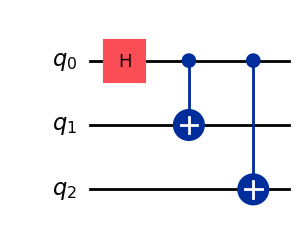

In [8]:
from qiskit.quantum_info import SparsePauliOp

S3 = SparsePauliOp.from_list([("ZZI", np.sqrt(2)), ("ZIZ", 2.), ("XXX", np.sqrt(2))])

qr = QuantumRegister(3,'q')
ghz3circ = QuantumCircuit(qr)

#GHZ3
ghz3circ.h(0)
ghz3circ.cx(0,1)
ghz3circ.cx(0,2)

ghz3circ.draw('mpl')

In [9]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(ghz3circ)

isa_S3 = S3.apply_layout(layout=isa_circuit.layout)



pub = (
    isa_circuit,  # circuit
    [[isa_S3]],         # Observables
)

from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator

estimator = Estimator(backend, options={"resilience_level": 2})
job = estimator.run(pubs=[pub])

job_result = job.result()

In [10]:
#job = service.job('<JOB-ID-HERE>')
#job_result = job.result()
s3_est = job_result[0].data.evs[0]
ds3 = job_result[0].data.stds[0]

print(s3_est)
print(ds3)
print(2.*(3.-2)+2.*np.sqrt(2.))

[4.97283228]
[0.16104898]
4.82842712474619


$N=4$ 

$$\hat{S}_{4} = \hat{A}_{0}(\hat{B}_{0}+\hat{B}_{1}) + 2(\hat{A}_{0}\hat{C}_{0} +\hat{C}_{0}\hat{D}_{0}) + \hat{A}_{1}(\hat{B}_{0}-\hat{B}_{1})\hat{C}_{1}\hat{D}_{1}$$

$$\hat{S}_{4} = \sqrt{2}\hat{Z}\hat{Z}\hat{I}\hat{I} +2\hat{Z}\hat{I}\hat{Z}\hat{I} + +2\hat{I}\hat{I}\hat{Z}\hat{Z}+\sqrt{2}\hat{X}\hat{X}\hat{X}\hat{X}$$

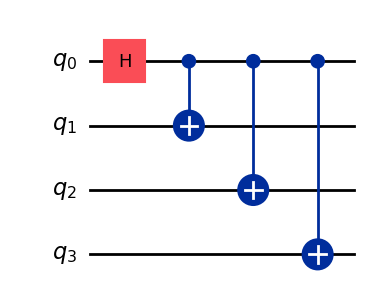

In [11]:
S4 = SparsePauliOp.from_list([("ZZII", np.sqrt(2)), ("ZIZI", 2.), ("IIZZ", 2.), ("XXXX", np.sqrt(2))])

qr = QuantumRegister(4,'q')
ghz4circ = QuantumCircuit(qr)

#GHZ4
ghz4circ.h(0)
ghz4circ.cx(0,1)
ghz4circ.cx(0,2)
ghz4circ.cx(0,3)

ghz4circ.draw('mpl')

In [13]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(ghz4circ)

isa_S4 = S4.apply_layout(layout=isa_circuit.layout)



pub = (
    isa_circuit,  # circuit
    [[isa_S4]],         # Observables
)


estimator = Estimator(backend, options={"resilience_level": 2})
job = estimator.run(pubs=[pub])

job_result = job.result()

In [14]:
#job = service.job('<JOB-ID-HERE>')
#job_result = job.result()
s4_est = job_result[0].data.evs[0]
ds4 = job_result[0].data.stds[0]

print(s4_est)
print(ds4)
print(2.*(4.-2)+2.*np.sqrt(2.))

[7.45986404]
[0.21530782]
6.82842712474619


$N=5$ 

$$\hat{S}_{5} = \hat{A}_{0}(\hat{B}_{0}+\hat{B}_{1}) + 2(\hat{A}_{0}\hat{C}_{0} +\hat{C}_{0}\hat{D}_{0} + \hat{D}_{0}\hat{E}_{0}) + \hat{A}_{1}(\hat{B}_{0}-\hat{B}_{1})\hat{C}_{1}\hat{D}_{1}\hat{E}_{1}$$

$$\hat{S}_{5} = \sqrt{2}\hat{Z}\hat{Z}\hat{I}\hat{I}\hat{I} +2\hat{Z}\hat{I}\hat{Z}\hat{I}\hat{I} +2\hat{I}\hat{I}\hat{Z}\hat{Z}\hat{I}+2\hat{I}\hat{I}\hat{I}\hat{Z}\hat{Z}+\sqrt{2}\hat{X}\hat{X}\hat{X}\hat{X}\hat{X}$$

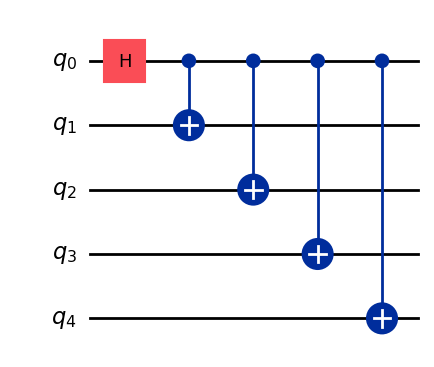

In [15]:
S5 = SparsePauliOp.from_list([("ZZIII", np.sqrt(2)), ("ZIZII", 2.), ("IIZZI", 2.), ("IIIZZ", 2.), ("XXXXX", np.sqrt(2))])

qr = QuantumRegister(5,'q')
ghz5circ = QuantumCircuit(qr)

#GHZ4
ghz5circ.h(0)
ghz5circ.cx(0,1)
ghz5circ.cx(0,2)
ghz5circ.cx(0,3)
ghz5circ.cx(0,4)

ghz5circ.draw('mpl')

In [17]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(ghz5circ)

isa_S5 = S5.apply_layout(layout=isa_circuit.layout)



pub = (
    isa_circuit,  # circuit
    [[isa_S5]],         # Observables
)


estimator = Estimator(backend, options={"resilience_level": 2})
job = estimator.run(pubs=[pub])

job_result = job.result()

In [18]:
#job = service.job('<JOB-ID-HERE>')
#job_result = job.result()
s5_est = job_result[0].data.evs[0]
ds5 = job_result[0].data.stds[0]

print(s5_est)
print(ds5)
print(2.*(5.-2)+2.*np.sqrt(2.))

[9.43485079]
[0.29136709]
8.82842712474619


## Version information:

In [1]:
import qiskit_ibm_runtime

qiskit_ibm_runtime.version.get_version_info()

'0.25.0'

In [2]:
import qiskit 

qiskit.version.get_version_info()

'1.1.1'